# IMU + GPS noise analysis

This notebook investigates the noise of IMU + GPS data collected whilst the device was stationary for a period of time.

In [68]:
# Imports
import os
import csv
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Load data
session_uuid = "faf08194-faf2-4c0f-b58e-047ac252f30a"

# IMU data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_imu_data_processed = parent_path + "/datasets/" + "session-" + session_uuid + "/imu_data/processed/"

timestamp = pd.read_csv(path_to_imu_data_processed + "timestamp.csv")
attitude = pd.read_csv(path_to_imu_data_processed + "attitude.csv")
gravity = pd.read_csv(path_to_imu_data_processed + "gravity.csv")
magnetic_field = pd.read_csv(path_to_imu_data_processed + "magnetic_field.csv")
rotational_rate = pd.read_csv(path_to_imu_data_processed + "rotational_rate.csv")
user_acceleration = pd.read_csv(path_to_imu_data_processed + "user_acceleration.csv")

# GPS data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_gps_data = parent_path + "/datasets/" + "session-" + session_uuid + "/gps_data/gps.csv"
gps_data = pd.read_csv(path_to_gps_data)

timestamp.unstack()

time  0       2022-02-09:18:18:35.830
      1       2022-02-09:18:18:35.860
      2       2022-02-09:18:18:35.890
      3       2022-02-09:18:18:35.920
      4       2022-02-09:18:18:35.950
                       ...           
      6880    2022-02-09:18:22:01.289
      6881    2022-02-09:18:22:01.319
      6882    2022-02-09:18:22:01.349
      6883    2022-02-09:18:22:01.379
      6884    2022-02-09:18:22:01.409
Length: 6885, dtype: object

# Processed IMU data vs time

<AxesSubplot:>

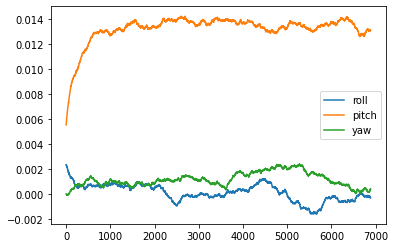

In [70]:
attitude.cumsum()
attitude.plot()

<AxesSubplot:>

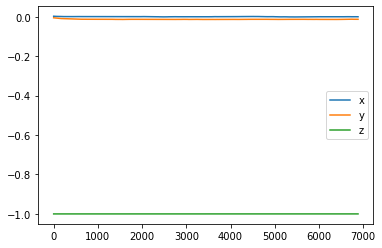

In [71]:
gravity.cumsum()
gravity.plot()

<AxesSubplot:>

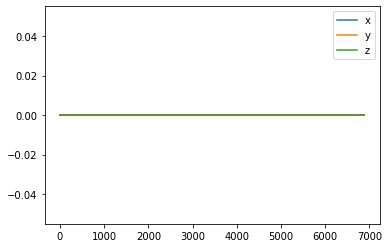

In [72]:
magnetic_field.cumsum()
magnetic_field.plot()

<AxesSubplot:>

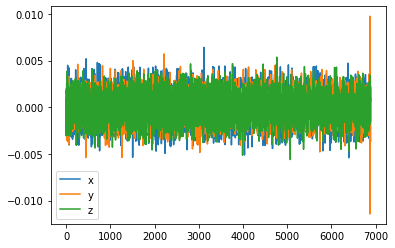

In [73]:
rotational_rate.cumsum()
rotational_rate.plot()

<AxesSubplot:>

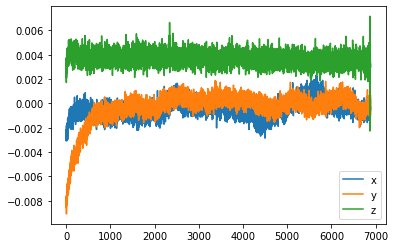

In [74]:
user_acceleration.cumsum()
user_acceleration.plot()

# Noise of processed IMU data

In [75]:
def plot_distribution(data, key, plot_title, path_to_csv_file=None):
    """
    Gaussian distribution plots
    
    """
    size = len(data)

    # CSV writer
    if path_to_csv_file != None:
        csv_file = open(path_to_csv_file, 'w')
        writer = csv.writer(csv_file)

        # Write header
        writer.writerow([
            key[0]+"_mean", key[0] + "_std", 
            key[1]+"_mean", key[1] + "_std", 
            key[2]+"_mean", key[2] + "_std", 
        ])

    values_for_csv_file = []
    colours = ['tab:blue', 'tab:orange', 'tab:green']
    for i in range(size):
        mu, sigma = data[i].mean(), data[i].std()
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)         
        
        plt.plot(x, stats.norm.pdf(x, mu, sigma), color=colours[i], label=key[i])
   
        print(i, f"\t[{key[i]}] Ave: ", mu)
        print(i, f"\t[{key[i]}]  Std: ", sigma)

        values_for_csv_file.append(mu)
        values_for_csv_file.append(sigma)
    
    if path_to_csv_file != None:
        # Write mean/std values
        writer.writerow(values_for_csv_file)
        
        # Close the CSV file
        csv_file.close()

    plt.title(plot_title)
    plt.legend()

    
    
        

0 	[roll] Ave:  9.883179209586689e-05
0 	[roll]  Std:  0.0006706920721619714
1 	[pitch] Ave:  0.013197393995862436
1 	[pitch]  Std:  0.0011219258153109806
2 	[yaw] Ave:  0.0011494848855890956
2 	[yaw]  Std:  0.0005607027337239163


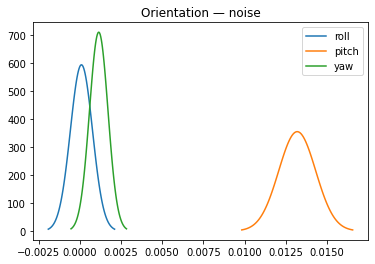

In [76]:
# Attitude
plot_distribution(
    data=[attitude['roll'], attitude['pitch'], attitude['yaw']],
    key=["roll", 'pitch', 'yaw'], 
    plot_title="Orientation — noise"
)


0 	[x] Ave:  9.882713927700485e-05
0 	[x]  Std:  0.0006706384781046727
1 	[y] Ave:  -0.013197003431096033
1 	[y]  Std:  0.001121853535933362


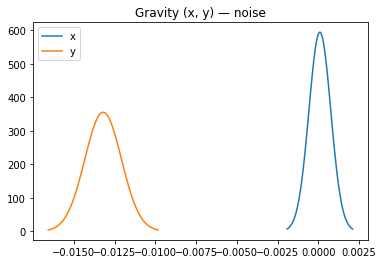

In [77]:
# Gravity (x, y)
plot_distribution(
    data=[gravity['x'], gravity['y']],
    key=["x", 'y', 'z'],
    plot_title="Gravity (x, y) — noise"
)


0 	[z] Ave:  -0.9999120563376876
0 	[z]  Std:  1.2471101758753757e-05


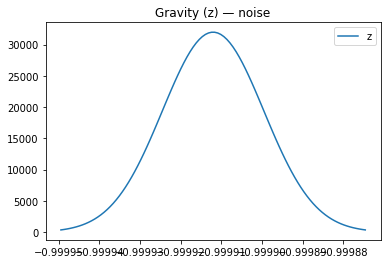

In [78]:
# Gravity (z)
plot_distribution(
    data=[gravity['z']],
    key=['z'],
    plot_title="Gravity (z) — noise"
)

0 	[x] Ave:  -0.0003888586835626744
0 	[x]  Std:  0.0007364109420075044
1 	[y] Ave:  -0.00033628760228986897
1 	[y]  Std:  0.0012900317599939552
2 	[z] Ave:  0.0037139299561687743
2 	[z]  Std:  0.0005471091997588109


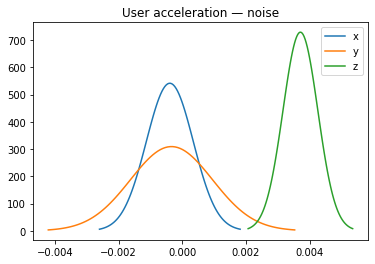

In [79]:
# User acceleration (x, y, z)
plot_distribution(
    data=[user_acceleration['x'], user_acceleration['y'], user_acceleration['z']],
    key=["x", 'y', 'z'], 
    plot_title="User acceleration — noise", 
    path_to_csv_file=path_to_imu_data_processed+"user_acceleration_noise.csv"
)

